In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [2]:
data_path = "../data/processed"

# Plot settings & helper functions

In [3]:
figsize = (7, 7)
title_fontsize = 20
label_fontsize = 14
tick_fontsize = 14
legend_fontsize = 14
cmap = "coolwarm"

In [4]:
def camel_case_split(s):
    words = [[s[0]]]
  
    for c in s[1:]:
        if words[-1][-1].islower() and c.isupper():
            words.append(list(c))
        else:
            words[-1].append(c)
  
    return " ".join([(''.join(word)).capitalize() for word in words])

# GBOV - LAI


In [7]:
in_situ_file = "GBOV/GBOV_RM07_in_situ.csv"
df = pd.read_csv(os.path.join(data_path, in_situ_file))

In [8]:
df.describe()

,Unnamed: 0,LAI_Miller,LAI_Warren,B1,B2,B3,B4,B5,B6,B7,...,B12,QA10,QA20,QA60,cloud_probability,observer_azimuth,observer_zenith,solar_zenith,solar_azimuth,relative_azimuth
count,3004.00000,3004.000000,3.004000e+03,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,...,3004.000000,3004.0,3004.0,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000,3004.000000
mean,1501.50000,2.175335,1.869337e+00,0.056152,0.063669,0.086499,0.095222,0.136603,0.241323,0.276199,...,0.173654,0.0,0.0,146.918775,7.896138,187.579262,5.882875,30.742854,142.962852,170.736452
std,867.32443,2.386404,2.008178e+00,0.059844,0.062270,0.062631,0.083753,0.076057,0.074002,0.088340,...,0.115905,0.0,0.0,509.406019,13.837620,76.855126,2.110731,10.170338,17.424040,113.700356
min,0.00000,0.000021,3.000000e-07,-0.106119,-0.053657,-0.017403,-0.008774,0.008159,0.019741,0.024013,...,0.006513,0.0,0.0,0.000000,0.000000,100.597067,2.434298,15.949376,69.774050,0.946588
25%,750.75000,0.056000,6.230000e-02,0.024531,0.027010,0.044208,0.028875,0.079394,0.199304,0.222937,...,0.070378,0.0,0.0,0.000000,1.000000,104.214752,4.258922,22.045953,135.494653,45.412926
50%,1501.50000,1.217500,1.058500e+00,0.048256,0.052208,0.073788,0.069364,0.119918,0.238452,0.266518,...,0.135253,0.0,0.0,0.000000,2.000000,210.483048,5.056979,28.197267,146.578725,226.652935
75%,2252.25000,4.092500,3.670000e+00,0.077888,0.092921,0.121530,0.153573,0.185085,0.282897,0.321079,...,0.265377,0.0,0.0,0.000000,6.000000,256.291739,7.699617,37.393540,154.938364,256.828106
max,3003.00000,10.980000,8.280000e+00,1.119873,1.096225,1.013699,1.011749,1.043744,1.023045,0.994278,...,0.492807,0.0,0.0,2048.000000,69.000000,288.279895,10.032018,59.572891,170.783442,359.986992


In [21]:
df.columns

Index(['Unnamed: 0', 'Site', 'date', 'plotID', 'retrieval_date', 'LAI_Miller',
       'LAI_Warren', 'B1', 'B2', 'B3', 'B4', 'B5', 'B6', 'B7', 'B8', 'B8A',
       'B9', 'B10', 'B11', 'B12', 'QA10', 'QA20', 'QA60', 'cloud_probability',
       'nlcdClass', 'observer_azimuth', 'observer_zenith', 'solar_zenith',
       'solar_azimuth', 'relative_azimuth'],
      dtype='object')

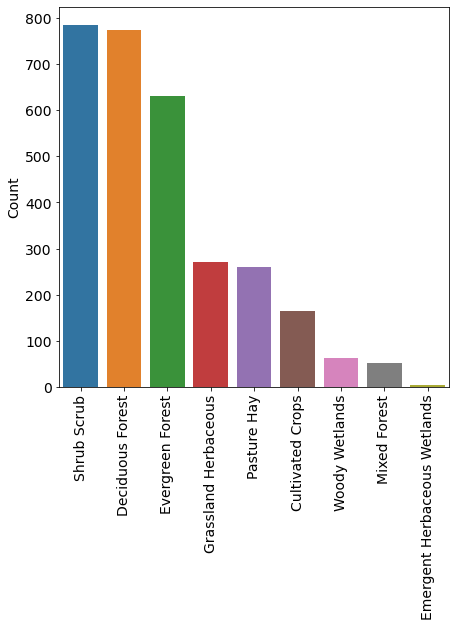

In [20]:
fig, ax = plt.subplots(figsize=figsize)

ax.xaxis.label.set_size(label_fontsize)
ax.yaxis.label.set_size(label_fontsize)
ax.title.set_size(title_fontsize)
x = df["nlcdClass"].value_counts().keys()
y = df["nlcdClass"].value_counts().values
sns.barplot(x=x, y=y, log=False)

ax.set_ylabel("Count")

ax.set_xticklabels([camel_case_split(str(s)) for s in x])

# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=config["plotting"]["legend_fontsize"], title=legend_title, title_fontsize=config["plotting"]["legend_fontsize"])
plt.xticks(rotation=90)

ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)

plt.show()

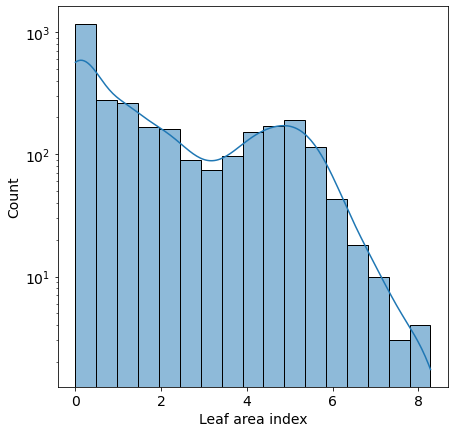

In [23]:
fig, ax = plt.subplots(figsize=figsize)

ax.xaxis.label.set_size(label_fontsize)
ax.yaxis.label.set_size(label_fontsize)
ax.title.set_size(title_fontsize)

sns.histplot(df["LAI_Warren"], ax=ax, kde=True, stat="count", log_scale=(False, True))

ax.set_ylabel("Count")
ax.set_xlabel("Leaf area index")

# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=config["plotting"]["legend_fontsize"], title=legend_title, title_fontsize=config["plotting"]["legend_fontsize"])

ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)

plt.show()

# NFI Sweden - AGB

In [5]:
in_situ_file = "AGB/NFI_Sweden/in_situ_inc_SAR.csv"
df = pd.read_csv(os.path.join(data_path, in_situ_file))
df.describe()

,index,B1,B2,B3,B4,B5,B7,B6,B10,zenith_angle,azimuth_angle,AGB_sum,VV,VH,angle
count,11973.000000,11973.000000,11973.000000,11973.000000,11973.000000,11973.000000,11973.000000,11973.000000,11973.000000,11973.000000,11973.000000,11973.000000,11973.000000,11973.000000,11973.000000
mean,5986.000000,0.133109,0.134711,0.143794,0.141926,0.209057,0.129876,0.148691,0.386605,40.017714,162.028466,97441.258438,-9.574893,-15.297911,38.338316
std,3456.451721,0.074216,0.073144,0.066628,0.068157,0.049526,0.033028,0.034559,0.031393,2.846700,4.349257,85781.934646,1.217478,1.244500,1.927651
min,0.000000,0.069760,0.071545,0.077625,0.074670,0.112230,0.078520,0.085810,0.207910,34.553132,153.979611,0.000000,-16.526483,-22.198104,30.491100
25%,2993.000000,0.080180,0.082150,0.093140,0.088845,0.171165,0.101700,0.122710,0.363010,37.497497,158.215051,30386.314467,-10.293121,-15.935644,37.240332
50%,5986.000000,0.089860,0.093750,0.112520,0.111085,0.197580,0.123240,0.140375,0.387095,39.812442,161.622922,78420.115942,-9.533973,-15.132856,38.281136
75%,8979.000000,0.171595,0.172330,0.180230,0.181400,0.237865,0.152060,0.167100,0.412975,42.268891,165.328201,142682.326866,-8.800475,-14.473313,39.379745
max,11972.000000,0.447750,0.446800,0.427700,0.428530,0.421910,0.252230,0.299970,0.463900,47.320069,171.836764,607509.979350,-3.108940,-10.155976,44.911510


In [19]:
for col in df.columns:
    print("- {}".format(col))

- Unnamed: 0
- SR_B1
- SR_B2
- SR_B3
- SR_B4
- SR_B5
- SR_B7
- SR_B6
- ST_B10
- zenith_angle
- azimuth_angle
- AGB_sum
- VV
- VH
- angle


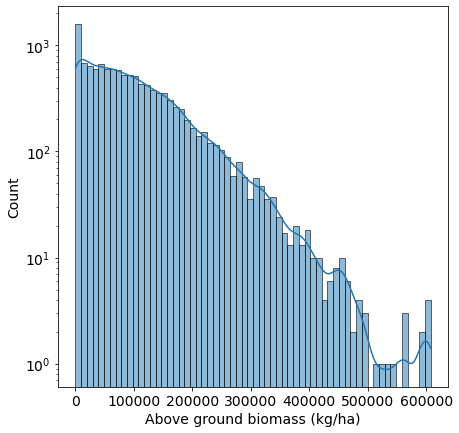

In [7]:
fig, ax = plt.subplots(figsize=figsize)

ax.xaxis.label.set_size(label_fontsize)
ax.yaxis.label.set_size(label_fontsize)
ax.title.set_size(title_fontsize)

sns.histplot(df["AGB_sum"], ax=ax, kde=True, stat="count", log_scale=(False, True))

ax.set_ylabel("Count")
ax.set_xlabel("Above ground biomass (kg/ha)")

# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=config["plotting"]["legend_fontsize"], title=legend_title, title_fontsize=config["plotting"]["legend_fontsize"])

ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)

plt.show()

# NOMAD - Chla

In [4]:
in_situ_file = "NOMAD/in_situ_MERIS.csv"
df = pd.read_csv(os.path.join(data_path, in_situ_file))
df.describe()

,Unnamed: 0,rrs_MER1,rrs_MER2,rrs_MER3,rrs_MER4,rrs_MER5,rrs_MER6,rrs_MER7,chla
count,470.00000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000,470.000000
mean,407.37234,0.003952,0.004017,0.004648,0.004553,0.004927,0.002434,0.001709,5.124364
std,205.83273,0.003981,0.003316,0.003184,0.003400,0.004765,0.003784,0.002925,8.437829
min,19.00000,0.000050,0.000140,0.000194,0.000250,0.000093,0.000004,0.000000,0.017000
25%,235.25000,0.001401,0.001680,0.002578,0.002645,0.001815,0.000333,0.000200,0.637500
50%,384.50000,0.002392,0.002860,0.003841,0.003696,0.003223,0.001123,0.000713,1.969545
75%,584.75000,0.005089,0.005347,0.006042,0.005163,0.006230,0.002982,0.001972,6.081563
max,831.00000,0.022104,0.017254,0.024536,0.029630,0.045403,0.037203,0.026784,70.213300


In [10]:
simulation_file = "NOMAD/simulation_MERIS.csv"
sim_df = pd.read_csv(os.path.join(data_path, simulation_file))
sim_df.describe()

,no,rrs_MER1,rrs_MER2,rrs_MER3,rrs_MER4,rrs_MER5,rrs_MER6,rrs_MER7,chla
count,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000,432.000000
mean,280.004630,0.003915,0.004001,0.004759,0.004706,0.006211,0.003360,0.003288,2.145662
std,129.257311,0.003944,0.002858,0.002411,0.002668,0.005240,0.004264,0.004197,4.521115
min,1.000000,0.000274,0.000444,0.000765,0.001039,0.000941,0.000142,0.000134,0.008782
25%,174.750000,0.001218,0.001819,0.003026,0.002917,0.002227,0.000459,0.000440,0.076939
50%,282.500000,0.002266,0.003110,0.004307,0.003900,0.004473,0.001362,0.001315,0.398032
75%,390.250000,0.004935,0.005331,0.006251,0.005538,0.008641,0.004661,0.004546,2.174684
max,499.000000,0.018375,0.013999,0.017492,0.018466,0.026839,0.024179,0.023876,43.596990


In [5]:
for col in df.columns:
    print("- {}".format(col))

- Unnamed: 0
- rrs_MER1
- rrs_MER2
- rrs_MER3
- rrs_MER4
- rrs_MER5
- rrs_MER6
- rrs_MER7
- chla


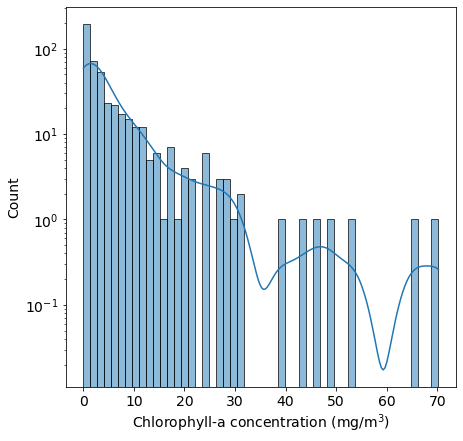

In [7]:
fig, ax = plt.subplots(figsize=figsize)

ax.xaxis.label.set_size(label_fontsize)
ax.yaxis.label.set_size(label_fontsize)
ax.title.set_size(title_fontsize)

sns.histplot(df["chla"], ax=ax, kde=True, stat="count", log_scale=(False, True))

ax.set_ylabel("Count")
ax.set_xlabel("Chlorophyll-a concentration (mg/m$^3$)")

# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0., fontsize=config["plotting"]["legend_fontsize"], title=legend_title, title_fontsize=config["plotting"]["legend_fontsize"])

ax.tick_params(axis='both', which='major', labelsize=tick_fontsize)

plt.show()

# WorldCrops - Yield

In [14]:
in_situ_file = "yield/reflectance_per_pixel_weekly_flat.csv"
df = pd.read_csv(os.path.join(data_path, in_situ_file))
df.describe()

,Unnamed: 0,B01_t-28,B02_t-28,B03_t-28,B04_t-28,B05_t-28,B06_t-28,B07_t-28,B08_t-28,B8A_t-28,...,B04_t-0,B05_t-0,B06_t-0,B07_t-0,B08_t-0,B8A_t-0,B09_t-0,B11_t-0,B12_t-0,Ertr.masse (Nass)(tonne/ha)
count,4887.0,4887.000000,4887.000000,4887.000000,4887.000000,4887.000000,4887.000000,4887.000000,4887.000000,4887.00000,...,4887.000000,4887.000000,4887.000000,4887.000000,4887.000000,4887.000000,4887.000000,4887.000000,4887.000000,4887.000000
mean,0.0,4060.492736,4301.945979,4235.750358,4253.039595,4513.972683,4804.519235,4785.258850,5003.543176,4747.63362,...,1182.481277,1702.260692,2582.115204,2790.700020,2808.447105,2948.527727,3003.413955,2586.037242,1864.787395,7.404254
std,0.0,1987.871543,2002.101792,1945.907700,1994.981761,1987.259843,1927.953256,1866.201131,1952.678611,1812.86102,...,477.741777,309.778419,677.701565,715.444756,716.319997,695.622395,593.373019,548.159265,612.043108,2.006984
min,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.454000
25%,0.0,2432.000000,2883.500000,2843.500000,2800.000000,3008.000000,3386.000000,3426.000000,3621.500000,3475.50000,...,689.000000,1517.000000,2125.000000,2298.000000,2312.000000,2467.500000,2579.000000,2138.000000,1271.500000,6.166000
50%,0.0,4126.000000,4249.000000,4170.000000,4171.000000,4420.000000,4705.000000,4669.000000,4859.000000,4647.00000,...,1266.000000,1726.000000,2379.000000,2554.000000,2580.000000,2732.000000,2919.000000,2462.000000,1821.000000,7.601000
75%,0.0,5539.000000,5827.500000,5704.500000,5752.000000,5875.000000,6100.000000,6073.500000,6420.000000,6024.00000,...,1594.000000,1906.500000,3042.000000,3335.000000,3370.000000,3491.000000,3378.000000,3034.000000,2427.000000,8.864000
max,0.0,10105.000000,10391.000000,10132.000000,10415.000000,10688.000000,10825.000000,10741.000000,11537.000000,10818.00000,...,2212.000000,2497.000000,4285.000000,4606.000000,4640.000000,4589.000000,4483.000000,3740.000000,3186.000000,16.810000


# FLUXNET - GPP